In [1]:
from SCTransform import SCTransform
#https://github.com/atarashansky/SCTransformPy
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [2]:
#adata = sc.datasets.pbmc3k()
datapath='input_vizgen_liver/alldata/'
ad_sp = sc.read_h5ad(datapath+'spatial_all.h5ad')
ad_sp 

AnnData object with n_obs × n_vars = 395215 × 347

In [3]:
sc.pp.filter_cells(ad_sp, min_counts=2)


In [4]:
ad_sp

AnnData object with n_obs × n_vars = 393286 × 347
    obs: 'n_counts'

In [5]:
sct_ad_sp = SCTransform(ad_sp,
                        min_cells=1,
                        gmean_eps=1,
                        n_genes=500,
                        n_cells=None, #use all cells
                        bin_size=500,
                        bw_adjust=3,
                        inplace=False)

In [6]:
sc.pp.pca(sct_ad_sp)

In [7]:
sc.pp.neighbors(sct_ad_sp,n_pcs=30)
sc.tl.umap(sct_ad_sp)
sc.tl.leiden(sct_ad_sp,resolution=1.0)

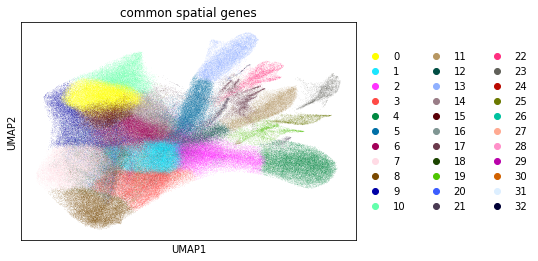

In [10]:
sc.pl.umap(sct_ad_sp,color=['leiden'],title=["common spatial genes"],wspace=0.2)

In [8]:
sct_ad_sp.obs.leiden.to_csv(datapath+'sct_leiden_cluster_res1.dat',header=True)

In [15]:
sc.tl.leiden(sct_ad_sp,resolution=2.0,key_added="leid_200")
#sc.pl.umap(sct_ad_sp,color=['leid_25'],title=["common spatial genes"],wspace=0.2)
sct_ad_sp.obs.leid_200.to_csv(datapath+'sct_leiden_cluster_res200.dat',header=True)

In [11]:
a=np.sort(np.unique(sct_ad_sp.obs.leiden))
f=open(datapath+'NameOfCT_sct_res100.dat','w')
for i in range(len(a)):
    f.write(str(a[i])+'\t'+'c'+str(a[i])+'\n')
f.close() 

In [16]:
a=np.sort(np.unique(sct_ad_sp.obs.leid_200))
f=open(datapath+'NameOfCT_sct_res200.dat','w')
for i in range(len(a)):
    f.write(str(a[i])+'\t'+'c'+str(a[i])+'\n')
f.close() 

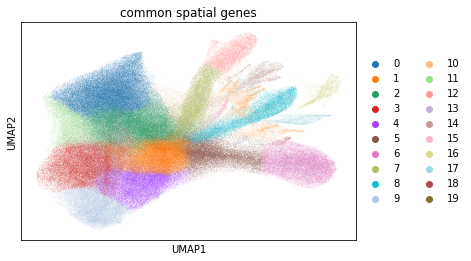

In [12]:
sc.tl.leiden(sct_ad_sp,resolution=0.5,key_added="leid_50")
sc.pl.umap(sct_ad_sp,color=['leid_50'],title=["common spatial genes"],wspace=0.2)

sct_ad_sp.obs.leid_50.to_csv(datapath+'sct_leiden_cluster_res50.dat',header=True)

In [19]:
a=np.sort(np.unique(sct_ad_sp.obs.leid_50))
f=open(datapath+'NameOfCT_sct_res50.dat','w')
for i in range(len(a)):
    f.write(str(a[i])+'\t'+'c'+str(a[i])+'\n')
f.close()    

In [20]:
a=np.sort(np.unique(sct_ad_sp.obs.leiden))
f=open(datapath+'NameOfCT_sct_res100.dat','w')
for i in range(len(a)):
    f.write(str(a[i])+'\t'+'c'+str(a[i])+'\n')
f.close() 

In [21]:
pcspace=sct_ad_sp.copy()

In [22]:
a=sc.read_h5ad(datapath+'scTransform_spatial_common')
b=sc.read_h5ad(datapath+'scTransform_single_common')
c=sc.read_h5ad(datapath+'scTransform_single_all_genes')


In [23]:
print('1',a)
print('2',b)
print('3',c)

1 AnnData object with n_obs × n_vars = 393878 × 346
    obs: 'umi_sct', 'log_umi_sct', 'gene_sct', 'log_gene_sct', 'umi_per_gene_sct', 'log_umi_per_gene_sct', 'leiden', 'leid_5', 'leid_25'
    var: 'Intercept_sct', 'log_umi_sct', 'theta_sct', 'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct', 'genes_step1_sct', 'log10_gmean_sct'
    uns: 'leid_25_colors', 'leid_5_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
2 AnnData object with n_obs × n_vars = 185894 × 335
    obs: 'umi_sct', 'log_umi_sct', 'gene_sct', 'log_gene_sct', 'umi_per_gene_sct', 'log_umi_per_gene_sct', 'leiden', 'leid_5', 'leid_25'
    var: 'Intercept_sct', 'log_umi_sct', 'theta_sct', 'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct', 'genes_step1_sct', 'log10_gmean_sct'
    uns: 'leid_25_colors', 'leid_5_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_um